Création d'un modèle de classification basé sur MLP.


In [1]:
#importation des library
%matplotlib inline
import matplotlib.pyplot as plt
import os
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.externals import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn import datasets
import flask
from flask import Flask
print("done")

done


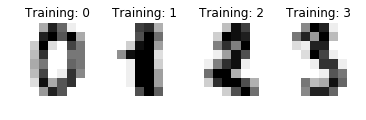

In [2]:
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [3]:
start=dt.datetime.now()
n_samples = len(digits.images)
X,y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X / 255., y, test_size=0.25)
print('digits avec %d training - %d test samples' % (len(y_train), len(y_test)))
print('distribution du dataset:', np.bincount(y.astype('int64')))
#training
params = {'hidden_layer_sizes': [(256,), (512,), (128, 256, 128,)]}
mlp = MLPClassifier(verbose=10, learning_rate='adaptive')
clf = GridSearchCV(mlp, params, verbose=10, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
print('Score best mean cross-validated:', clf.best_score_)
print('Meilleur parametre dans:', clf.best_params_)
joblib.dump(clf, 'model_MLP.pkl')
print("Modèle sauvegarder")
clf = clf.best_estimator_
print('Test accuracy:', clf.score(X_test, y_test))
print(dt.datetime.now() - start)

digits avec 1347 training - 450 test samples
('distribution du dataset:', array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.7min finished


Iteration 1, loss = 2.30282612
Iteration 2, loss = 2.27874822
Iteration 3, loss = 2.25758746
Iteration 4, loss = 2.23537552
Iteration 5, loss = 2.21087020
Iteration 6, loss = 2.18320658
Iteration 7, loss = 2.15218200
Iteration 8, loss = 2.11647911
Iteration 9, loss = 2.07654452
Iteration 10, loss = 2.03174766
Iteration 11, loss = 1.98209648
Iteration 12, loss = 1.92878101
Iteration 13, loss = 1.86969594
Iteration 14, loss = 1.80702622
Iteration 15, loss = 1.74214012
Iteration 16, loss = 1.67410798
Iteration 17, loss = 1.60442195
Iteration 18, loss = 1.53386981
Iteration 19, loss = 1.46424518
Iteration 20, loss = 1.39511649
Iteration 21, loss = 1.32847408
Iteration 22, loss = 1.26289910
Iteration 23, loss = 1.20036272
Iteration 24, loss = 1.14135178
Iteration 25, loss = 1.08425193
Iteration 26, loss = 1.03202526
Iteration 27, loss = 0.98158695
Iteration 28, loss = 0.93505376
Iteration 29, loss = 0.89128197
Iteration 30, loss = 0.85048273
Iteration 31, loss = 0.81262029
Iteration 32, los

C:\Users\Andry\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Modele testable par appel de webservice (API) via Flask
Etape 1 run Flask app dans un terminale prompt
    >python app.py
    
Etape 2
Une fois que app running, nous pouvons faire une requete pour une prediction
 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger pin code: 580-987-602

In [ ]:
# Appel et requete du model
url = "http://127.0.0.1:9000/predict_api"
data = json.dumps({'X':X_test[0]})
r = requests.post(url,data)
print r.json()